# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 620


['puerto natales',
 'sao vicente',
 'albany',
 'ushuaia',
 'hermanus',
 'edinburgh of the seven seas',
 'torghay',
 'port-aux-francais',
 'blackmans bay',
 'yaren',
 'longyearbyen',
 'balabac',
 'college',
 'lages',
 'nemuro',
 'waitangi',
 "nar'yan-mar",
 'susuman',
 'ar rutbah',
 'atafu village',
 'hawaiian paradise park',
 'mayqayyng',
 'nizhneangarsk',
 'shache',
 'adamstown',
 'san patricio',
 'lyantor',
 'port mathurin',
 'puerto penasco',
 'anadyr',
 'greymouth',
 'muncheberg',
 'grytviken',
 'kataragama',
 'kodiak',
 'rottenburg an der laaber',
 'yellowknife',
 'taiohae',
 'pangody',
 'qaqortoq',
 'sychevka',
 'saint-pierre',
 'enewetak',
 'vadso',
 'carnarvon',
 'vuktyl',
 'roma',
 'greenville',
 'halden',
 "skidel'",
 'taft',
 'mammoth lakes',
 'avarua',
 'mount gambier',
 'olonkinbyen',
 'cockburn town',
 'yunak',
 'trinidad',
 'stanley',
 'san andres',
 'westport',
 'papatowai',
 'vilyuchinsk',
 'tiksi',
 'ancud',
 'ilulissat',
 'egilsstadir',
 'alice springs',
 'motygino',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

unit = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make API request
        response = requests.get(city_url)
        # Check if city is found
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']
            
            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")
        
    # Handle exceptions
    except Exception as e:
        print(f"Error processing city {city}: {e}")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | sao vicente
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | torghay
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | yaren
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | balabac
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | lages
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | nar'yan-mar
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | ar rutbah
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Set 1 | mayqayy

In [6]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?q=dekalb&appid=4a155b12291ee7617f9eb8cbd69552ee&units=imperial


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,41.45,56,0,18.41,CL,1715637656
1,sao vicente,-23.9631,-46.3919,91.58,43,0,3.44,BR,1715637657
2,albany,42.6001,-73.9662,64.81,65,100,2.98,US,1715637362
3,ushuaia,-54.8000,-68.3000,40.66,70,40,36.82,AR,1715637657
4,hermanus,-34.4187,19.2345,57.79,82,53,10.78,ZA,1715637657


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,41.45,56,0,18.41,CL,1715637656
1,sao vicente,-23.9631,-46.3919,91.58,43,0,3.44,BR,1715637657
2,albany,42.6001,-73.9662,64.81,65,100,2.98,US,1715637362
3,ushuaia,-54.8000,-68.3000,40.66,70,40,36.82,AR,1715637657
4,hermanus,-34.4187,19.2345,57.79,82,53,10.78,ZA,1715637657


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

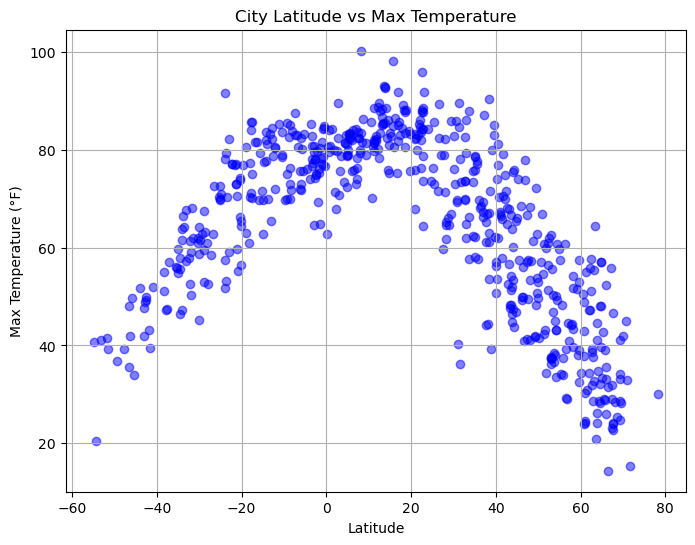

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

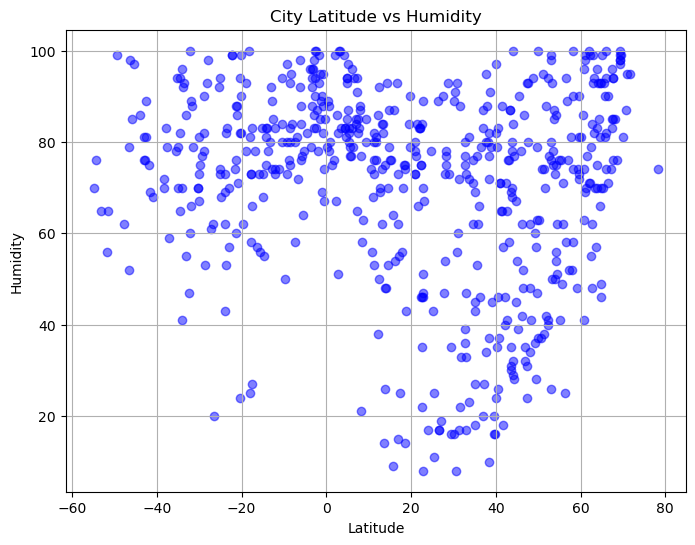

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = 'blue', alpha = 0.5)


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

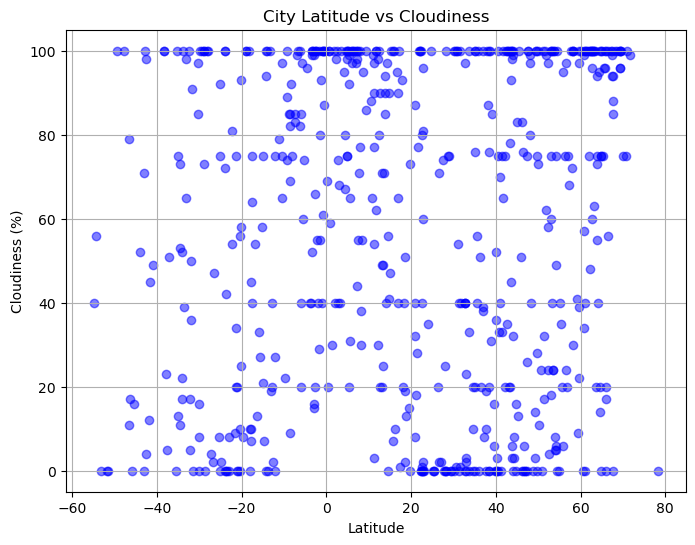

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = 'blue', alpha = 0.5)


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

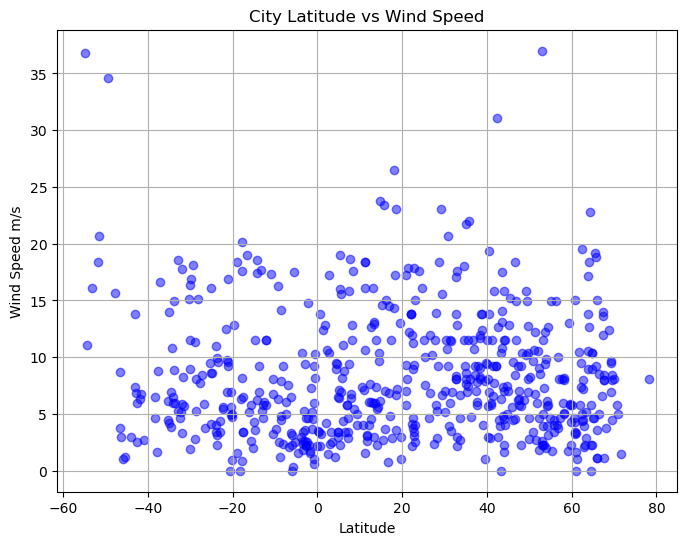

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = 'blue', alpha = 0.5)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")

plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,64.81,65,100,2.98,US,1715637362
6,torghay,49.6339,63.4981,50.76,79,28,12.73,KZ,1715637657
10,longyearbyen,78.2186,15.6401,30.04,74,0,8.05,SJ,1715637657
11,balabac,7.9868,117.0645,79.29,88,77,6.44,PH,1715637657
12,college,64.8569,-147.8028,57.09,49,75,10.36,US,1715637657


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,41.45,56,0,18.41,CL,1715637656
1,sao vicente,-23.9631,-46.3919,91.58,43,0,3.44,BR,1715637657
3,ushuaia,-54.8000,-68.3000,40.66,70,40,36.82,AR,1715637657
4,hermanus,-34.4187,19.2345,57.79,82,53,10.78,ZA,1715637657
5,edinburgh of the seven seas,-37.0676,-12.3116,57.00,59,51,16.64,SH,1715637657


###  Temperature vs. Latitude Linear Regression Plot

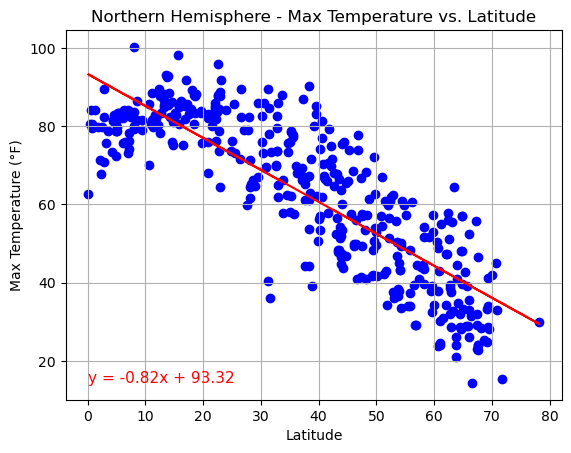

r-value is: -0.843155136728477


In [18]:
# Linear regression on Northern Hemisphere
# Extract latitude and temperature data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

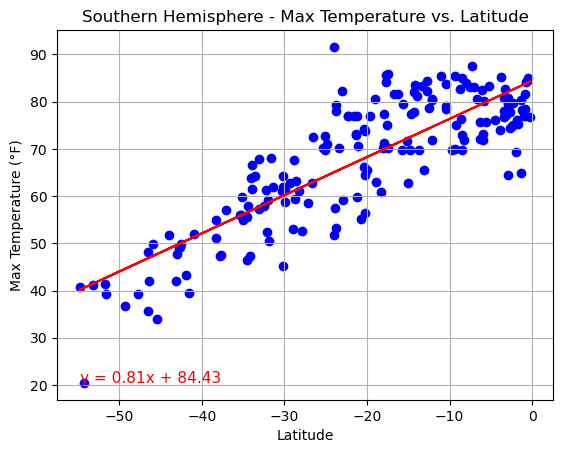

r-value is: 0.8388229275873362


In [19]:
# Linear regression on Southern Hemisphere
# Extract latitude and temperature data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

**Discussion about the linear relationship:** The scatter plot for the Northern Hemisphere reveals a negative relationship, while the data from the Southern Hemisphere exhibits a positive relationship. These findings suggest that as cities move farther away from the equator (latitude 0), maximum temperatures tend to decrease. Conversely, as cities approach the equator, maximum temperatures generally rise. This pattern underscores the significant influence of latitude on temperature variations across different regions, highlighting the role of proximity to the equator in shaping climatic conditions.

### Humidity vs. Latitude Linear Regression Plot

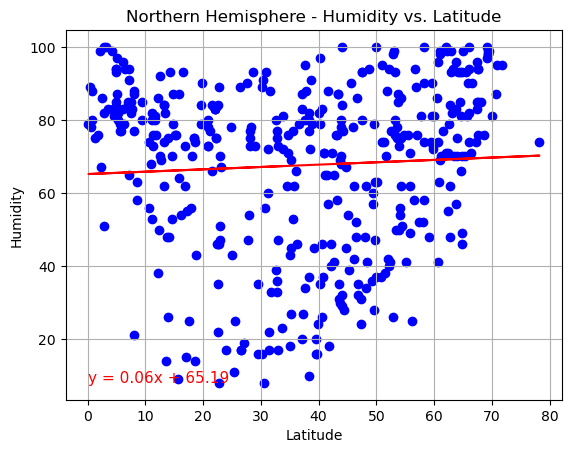

r-value is: 0.056202627266265806


In [20]:
# Northern Hemisphere
# Extract latitude and temperature data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)


# Show plot
plt.show()
print("r-value is:", rvalue)

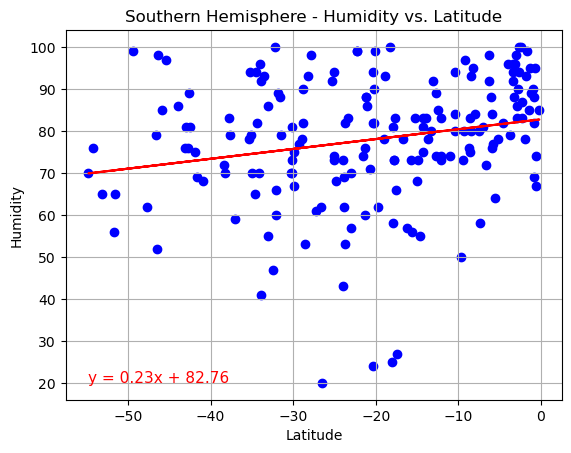

r-value is: 0.21963573707326672


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)



# Show plot
plt.show()
print("r-value is:", rvalue)

**Discussion about the linear relationship:** Examining the data from both the Northern and Southern hemisphere, it's evident that data points for humidity in relation to latitude are distributed across various points. Despite the disperison there isn't a strong change in regression line which indicates minimal variation. The consistency for both the Northern and Southern hemisphere plots suggest taht latitude isn't a significant influence on humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

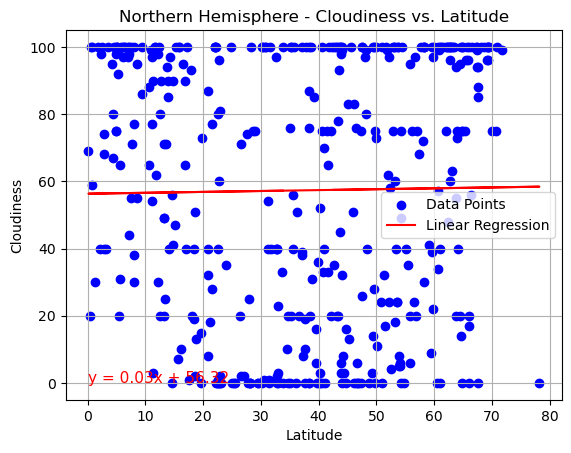

r-value is: 0.013979280868522324


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()
print("r-value is:", rvalue)

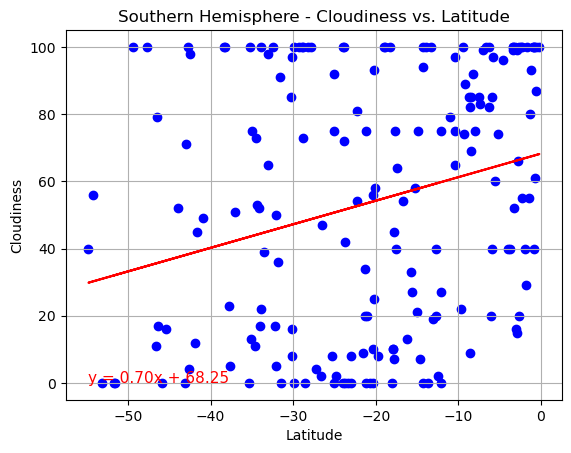

r-value is: 0.2628869986744394


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

**Discussion about the linear relationship:** Analysis of cloudiness data across latitudes in both the Northern and Southern Hemispheres reveals a diverse distribution of data points. Notably, both linear regression lines demonstrate a positive correlation, suggesting that as cities move further north, cloudiness tends to increase. This association underscores the influence of latitude on cloud cover patterns, with northern regions experiencing higher levels of cloudiness compared to their southern counterparts. 

### Wind Speed vs. Latitude Linear Regression Plot

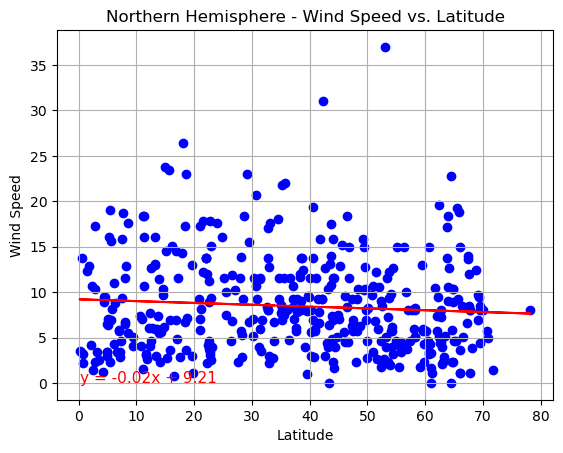

r-value is: -0.07595042041278657


In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

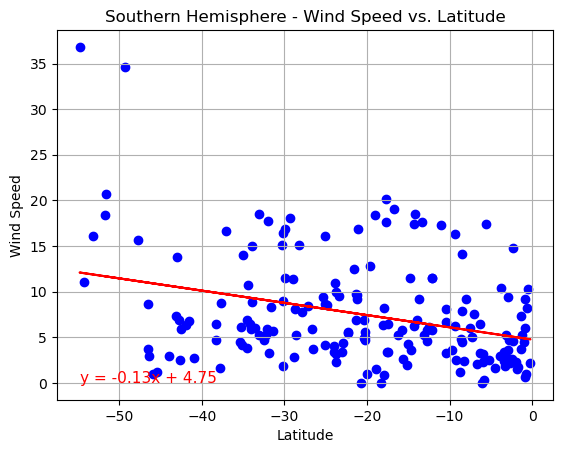

r-value is: -0.32350227325268904


In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')
plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

**Discussion about the linear relationship:** Both scatter plots depicting wind speed versus latitude in the Northern and Southern Hemisphere datasets exhibit similarities in the distribution of data points and the appearance of the linear regression lines. The minimal change observed in both regression lines suggests that latitude may not have a discernible influence on wind speeds. This consistency across hemispheres implies that other factors likely play a more significant role in determining wind patterns, overshadowing any direct correlation with latitude.